<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [19]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [20]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Getting familiar with data

In [8]:
# The following describes the dataset variables:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's''

In [21]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [22]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 2: Generate Descriptive Statistics and Visualizations

### 2.1 For the "Median value of owner-occupied homes" provide a boxplot

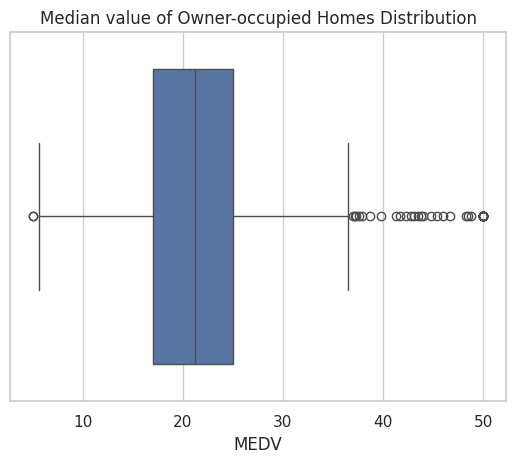

In [23]:
ax = sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Median value of Owner-occupied Homes Distribution')
pyplot.show()

In [24]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

**Description**:
1. The image shown above is the box plot of a single data set, which is the "Median value of owner-occupied homes" data.
2. The median is 21.2, and the dots outside the box are known as outliers.
3. Since the box plot is used for this single data set, the distribution of MEDV is most likely to be right-skewed.

### 2.2 Provide a  bar plot for the Charles river variable

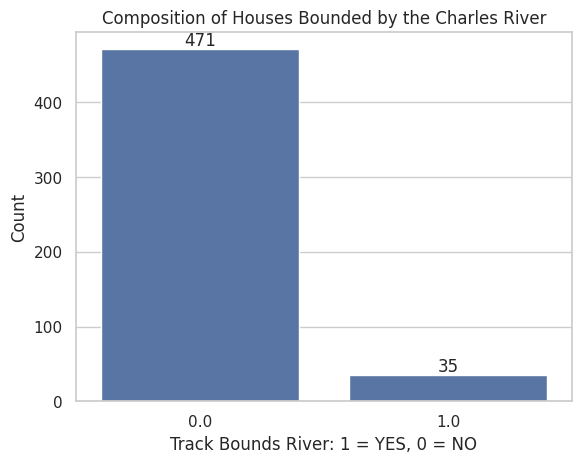

In [25]:
sns.set(style="whitegrid")
ax = sns.countplot(x="CHAS", data=boston_df)
ax.bar_label(ax.containers[0])
pyplot.title('Composition of Houses Bounded by the Charles River')
pyplot.xlabel('Track Bounds River: 1 = YES, 0 = NO')
pyplot.ylabel('Count')
pyplot.show()

**Description**:
1. The bar chart above shows the composition of houses in Boston that are either bounded by the Charles River or not.
2. Around 93% (471 of 506 houses) are not bounded by Charles River.
3. The bar chart (countplot in Seaborn) is an ideal way to visualize the composition or percentage of categorical data.

### 2.3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

As the AGE column is numerical, we need to discretize it into three groups of age. 

In [27]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

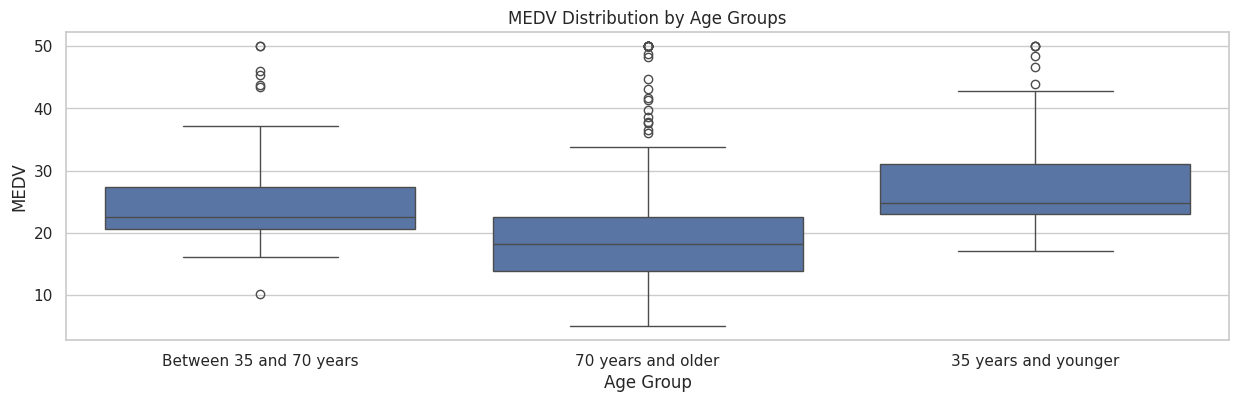

In [29]:
pyplot.figure(figsize=(15,4))
sns.set(style="whitegrid")
ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)
pyplot.xlabel('Age Group')
pyplot.ylabel('MEDV')
pyplot.title('MEDV Distribution by Age Groups')
pyplot.show()

**Description**:
1. The box plot above illustrates the median value of owner-occupied homes by age group. It is evident from the visualization that the group aged 70 or older has a lower median value and a slightly higher number of outliers in its distribution.
2. All the groups have right-skewed data distribution. 

### 2.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

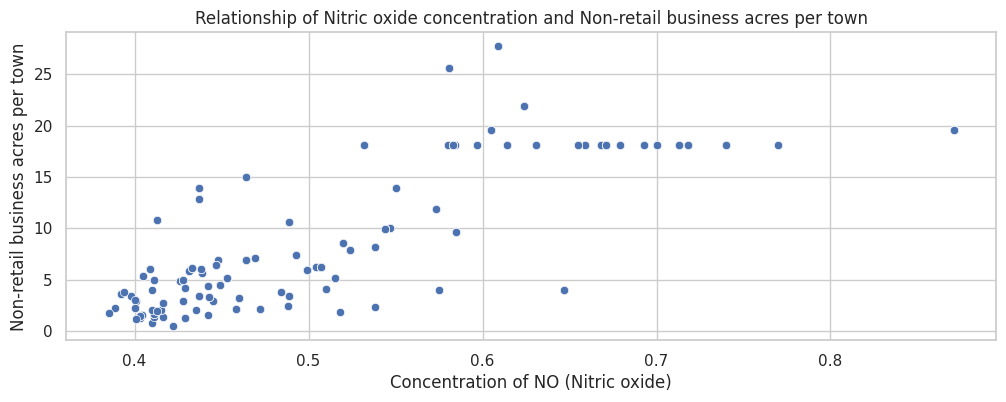

In [36]:
pyplot.figure(figsize=(12,4))
sns.set(style="whitegrid")
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
pyplot.xlabel('Concentration of NO (Nitric oxide)')
pyplot.ylabel('Non-retail business acres per town')
pyplot.title('Relationship of Nitric oxide concentration and Non-retail business acres per town')
pyplot.show()

**Description**:
1. A scatter plot is perfect for illustrating the relationship between two continuous values.
2. From my initial observation, the correlation between nitric oxide concentrations and the proportion of non-retail business acres per town appears visibly strong, as the concentration increases, so does the proportion.
3. However, when the concentration exceeds 0.6, the proportion of non-retail business remains constant at approximately 18%

### 2.5 Create a histogram for the pupil to teacher ratio variable

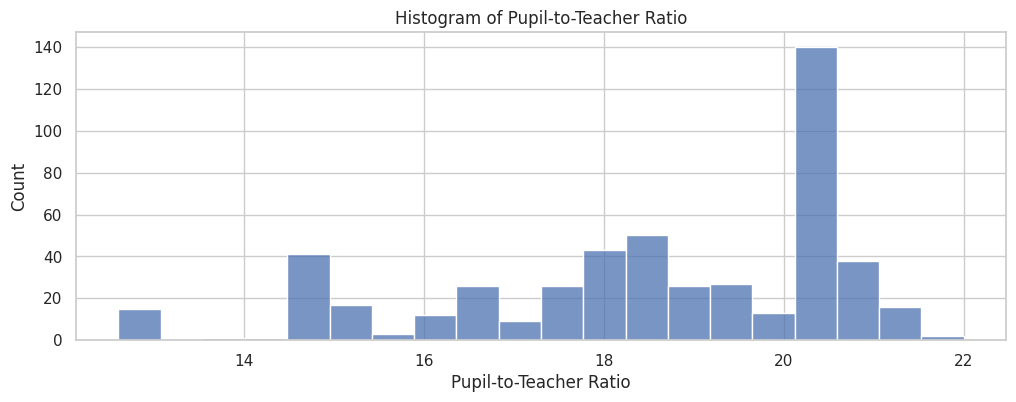

In [42]:
pyplot.figure(figsize=(12,4))
sns.set(style="whitegrid")
ax = sns.histplot(x="PTRATIO", data=boston_df, bins=20)
pyplot.xlabel('Pupil-to-Teacher Ratio')
pyplot.title('Histogram of Pupil-to-Teacher Ratio')
pyplot.show()

In [46]:
boston_df['PTRATIO'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

**Description**:
1. Alongside the box plot, the histogram provides another alternative for visualizing the distribution of a single data set
2. Based on the chart, we can infer that the distribution is likely to be left-skewed, with the mode at 20.2.
3. Increasing the number of bins will result in more detailed information displayed on the histogram.

## Task 3: Use the appropriate tests to answer the questions provided.

Be sure to:
1. State your hypothesis.
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.

### 3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:

*   Null Hypothesis > $H\_0: µ\_1 = µ\_2$ ("There is no significant difference in median value of houses bounded by the Charles river or not")
*   Alternative Hypothesis > $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river or not")
*   α = 0.05

In [47]:
# Before we run t-test, we must check the significance of the variance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

The p-value is **0.00323**. As the p-value < 0.05, then we can assume the variance is equal and will perform the t-test to test the hypothesis. 

In [48]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion**: The p-value equals to **7.390623170519905e-05** and < α, so that we may reject the null hypothesis. Therefore, a statistically significant difference exists in median value of houses bounded by the Charles river or not. 

### 3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:

*   Null Hypothesis > $H\_0: µ\_1 = µ\_2$ (the group population means are equal)
*   Alternative Hypothesis > $H\_1:$ At least one of the means differ
*   α = 0.05


Assuming the current year is 2024, units built prior to 1940 would be older than 84 years old, otherwise less than 84. Therefore, we need to categorize the column AGE into groups since ANOVA does not work with continuous variables

In [52]:
older_84 = boston_df[boston_df['AGE'] >= 84]['MEDV']
younger_84 = boston_df[boston_df['AGE'] < 84]['MEDV']

In [53]:
f_statistic, p_value = scipy.stats.f_oneway(older_84, younger_84)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 71.334018088109, P-Value: 3.2403818036980184e-16


**Conclusion**: The p-value equals to **3.2403818036980184e-16** and < α, so that we may reject the null hypothesis or we accept the alternative hypothesis. Therefore, a significant difference exists at least one of the means differ.

### 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:

*   Null Hypothesis > $H\_0: µ\_1 = µ\_2$ (There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town)
*   Alternative Hypothesis > $H\_1:$ (A relationship does exist between the two variables)
*   α = 0.05

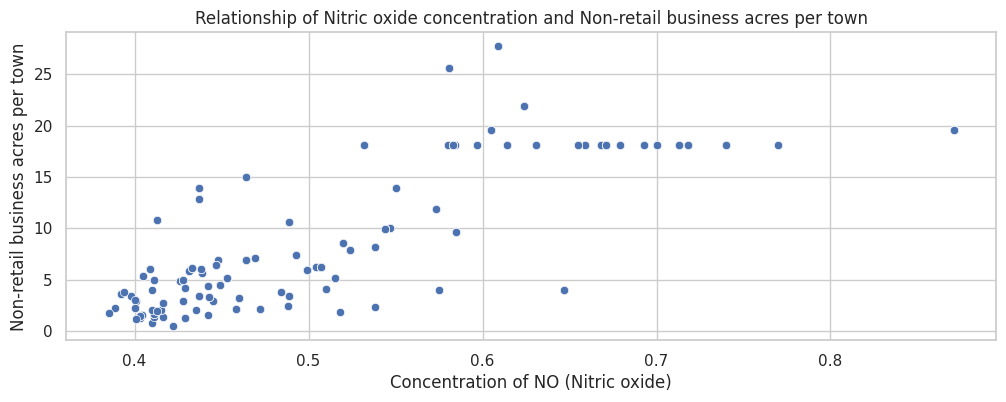

In [56]:
pyplot.figure(figsize=(12,4))
sns.set(style="whitegrid")
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
pyplot.xlabel('Concentration of NO (Nitric oxide)')
pyplot.ylabel('Non-retail business acres per town')
pyplot.title('Relationship of Nitric oxide concentration and Non-retail business acres per town')
pyplot.show()

In [25]:
#Perform the pearson correlation test
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion**: Pearson Correlation test is ideal to identify the relationship between two variables. After performing the test, we got the p-value which equals to **7.913361061210442e-98** and extremely < α, so that we may reject the null hypothesis or we accept the alternative hypothesis. We can not directly conclude that the two variables are independent.  Therefore, a significant difference exists between Nitric oxide concentrations and proportion of non-retail business acres per town. 

Furthermore, the correlation coefficient of **0.7636514469209192** suggests a strong relationship between the two variables, as it is close to 1.

### 3.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Hypothesis:

*   Null Hypothesis > $H\_0: µ\_1 = µ\_2$ (There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)
*   Alternative Hypothesis > $H\_1:$ (There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)
*   α = 0.05

We can build a model of regression first and get the statistics summary. 

In [58]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.21e-08
Time:                        23:59:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion** : The p-value in the table is nearly zero or < α, indicating rejection of the null hypothesis or acceptance of the alternative hypothesis. The coefficient of DIS is **1.0916**, representing the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.